In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
features = pd.read_csv('features.csv')

In [5]:
stores = pd.read_csv('stores.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
#Merging Stores and Features 

In [7]:
features_stores = features.merge(stores,how='inner',on='Store')

In [8]:
features_stores.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [9]:
#Merging features_stores to Test and Train Dataset

In [10]:
df_train = df_train.merge(features_stores,how='inner',on=['Store','Date','IsHoliday'])
df_test = df_test.merge(features_stores,how='inner',on=['Store','Date','IsHoliday'])

In [11]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [12]:
df_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [13]:
#Data Preprocessing

In [14]:
df_train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [15]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [16]:
df_train['Type'] = df_train['Type'] .apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))

In [17]:
df_train['IsHoliday'] = df_train['IsHoliday'].apply(lambda x: 1 if x == True else 0)

In [18]:
cols = df_train.columns.drop(['Date'])
df_train[cols] = df_train[cols].apply(pd.to_numeric, errors='coerce')

In [19]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Type'] = df_test['Type'] .apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
df_test['IsHoliday'] = df_test['IsHoliday'].apply(lambda x: 1 if x == True else 0)
cols = df_test.columns.drop(['Date'])
df_test[cols] = df_test[cols].apply(pd.to_numeric, errors='coerce')

In [20]:
df_train['Week'] = df_train['Date'].dt.week
df_test['Week'] = df_test['Date'].dt.week

df_train['Year'] = df_train['Date'].dt.year
df_test['Year'] = df_test['Date'].dt.year

C:\Users\SANZAV~1\AppData\Local\Temp/ipykernel_12248/2710258314.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_train['Week'] = df_train['Date'].dt.week
C:\Users\SANZAV~1\AppData\Local\Temp/ipykernel_12248/2710258314.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_test['Week'] = df_test['Date'].dt.week


In [21]:
#Checking Holidays

In [22]:
holiday_train = df_train[['Date','Week','Year','IsHoliday']]
holiday_train = holiday_train.loc[holiday_train['IsHoliday']==True].drop_duplicates()

holiday_test = df_test[['Date','Week','Year','IsHoliday']]
holiday_test = holiday_test.loc[holiday_test['IsHoliday']==True].drop_duplicates()

holidays = pd.concat([holiday_train, holiday_test])
holidays

,Date,Week,Year,IsHoliday
73,2010-02-12,6,2010,1
2218,2010-09-10,36,2010,1
3014,2010-11-26,47,2010,1
3372,2010-12-31,52,2010,1
3800,2011-02-11,6,2011,1
5940,2011-09-09,36,2011,1
6731,2011-11-25,47,2011,1
7096,2011-12-30,52,2011,1
7527,2012-02-10,6,2012,1
9667,2012-09-07,36,2012,1


In [23]:
#Checking the type of Holidays

In [24]:
def holiday_type(x):
    if   (x['IsHoliday']== 1) & (x['Week']==6):
       return 1 #SuperBowl
    elif (x['IsHoliday']== 1) & (x['Week']==36):
       return 2 #LaborDay
    elif (x['IsHoliday']== 1) & (x['Week']==47):
       return 3 #Thanksgiving
    elif (x['IsHoliday']== 1) & (x['Week']==52):
       return 4 #Christmas
    else:
       return 0

In [25]:
df_train['IsHoliday'] = df_train.apply(holiday_type, axis=1)
df_train['IsHoliday'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [26]:
df_test['IsHoliday'] = df_test.apply(holiday_type, axis=1)
df_test['IsHoliday'].unique()

array([0, 3, 4, 1], dtype=int64)

In [27]:
df_train = df_train.replace('None', np.nan)
df_train = df_train.replace('NaN', np.nan)
df_train = df_train.replace('NaT', np.nan)
df_train = df_train.replace('', np.nan)
train_nulls = (df_train.isnull().sum(axis = 0)/len(df_train))*100
train_nulls

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
Week             0.000000
Year             0.000000
dtype: float64

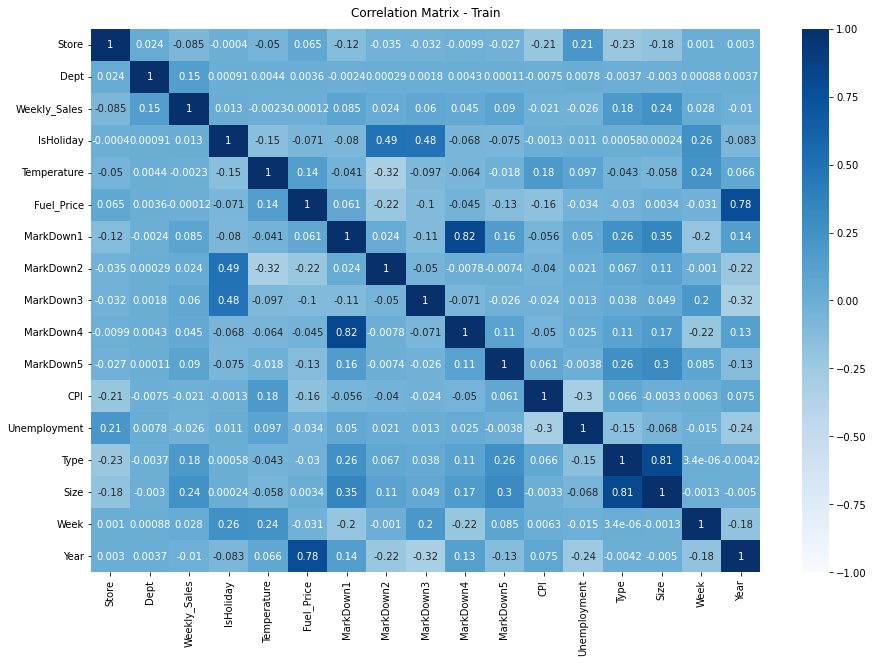

In [28]:
plt.figure(figsize=(15, 10))

heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True,cmap="Blues",annot_kws={"fontsize":10})
heatmap.set_title('Correlation Matrix - Train', fontdict={'fontsize':12}, pad=12);

In [29]:
df_test = df_test.replace('None', np.nan)
df_test = df_test.replace('NaN', np.nan)
df_test = df_test.replace('NaT', np.nan)
df_test = df_test.replace('', np.nan)
test_nulls = (df_test.isnull().sum(axis = 0)/len(df_test))*100
test_nulls

Store            0.000000
Dept             0.000000
Date             0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1        0.129493
MarkDown2       24.879198
MarkDown3        8.542203
MarkDown4       11.200723
MarkDown5        0.000000
CPI             33.165890
Unemployment    33.165890
Type             0.000000
Size             0.000000
Week             0.000000
Year             0.000000
dtype: float64

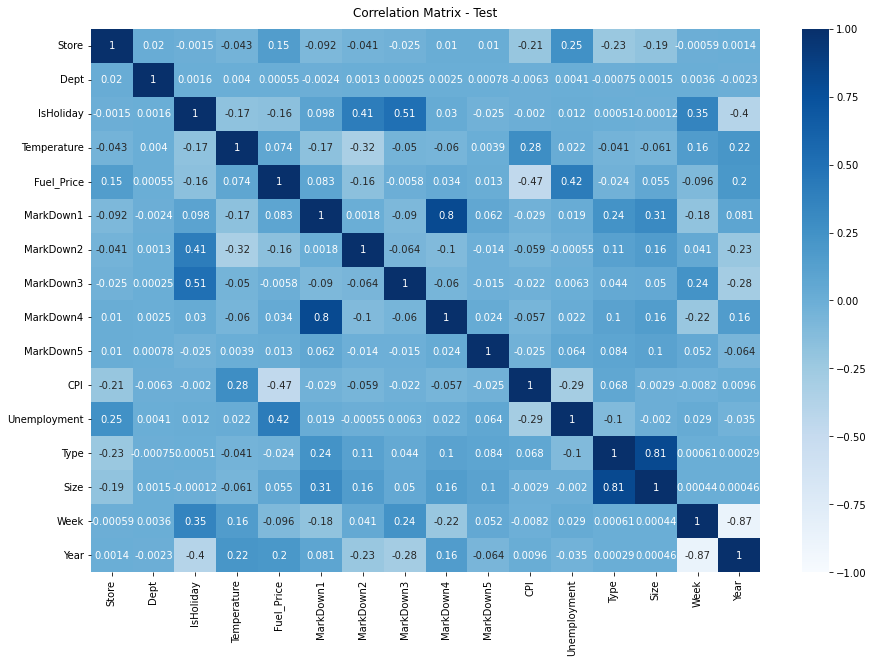

In [30]:
plt.figure(figsize=(15, 10))

heatmap = sns.heatmap(df_test.corr(), vmin=-1, vmax=1, annot=True,cmap="Blues",annot_kws={"fontsize":10})
heatmap.set_title('Correlation Matrix - Test', fontdict={'fontsize':12}, pad=12);

In [31]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
Year            0
dtype: int64

In [32]:
#Sales Average

In [33]:
weekly_sales = df_train.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = df_train.loc[df_train['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = df_train.loc[df_train['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = df_train.loc[df_train['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})

<AxesSubplot:xlabel='Year,Week'>

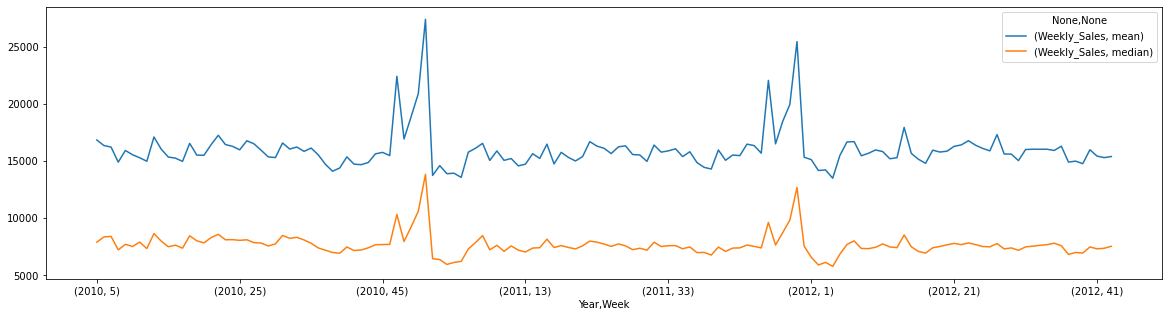

In [34]:
weekly_sales.plot(figsize=(20,5))

C:\Users\Sanza Vijin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sanza Vijin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sanza Vijin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


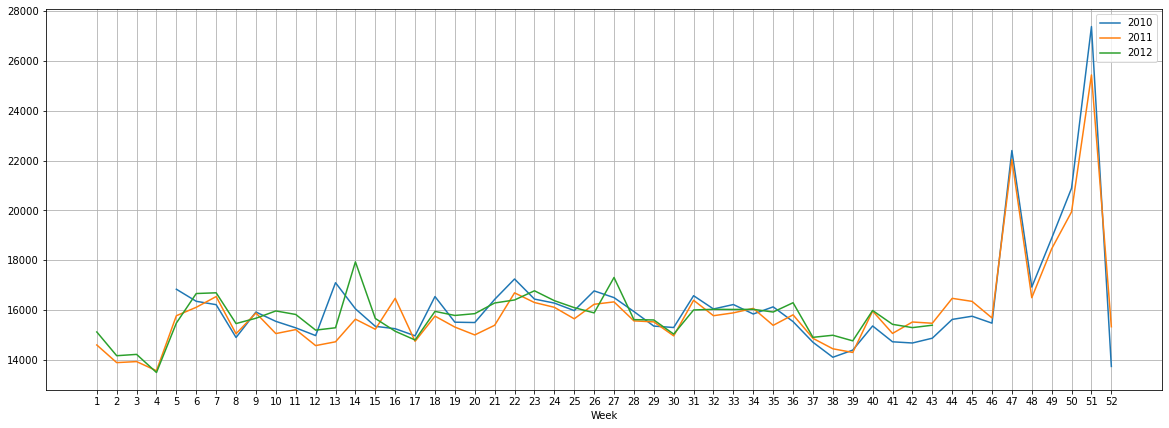

In [35]:
plt.figure(figsize=(20, 7))

sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()

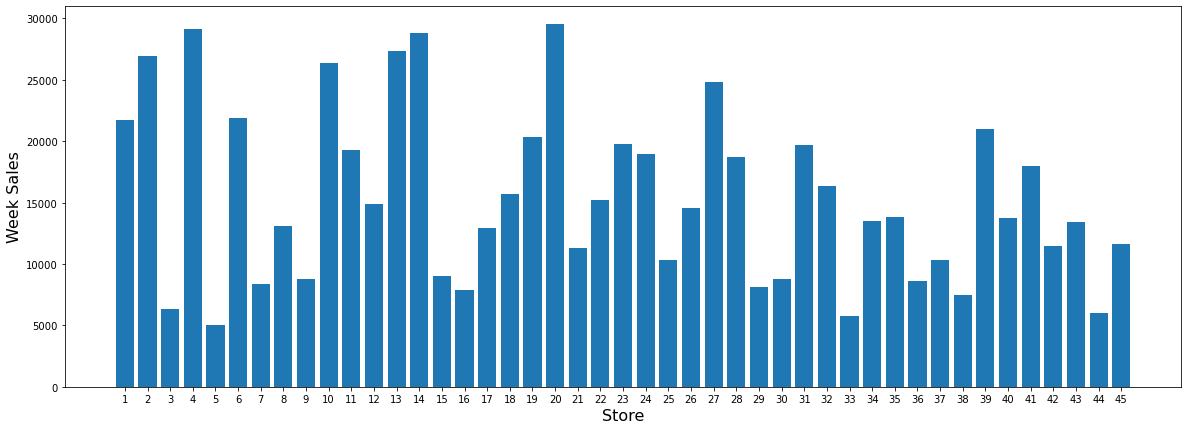

In [36]:
stores = df_train.groupby(['Store']).agg({'Weekly_Sales': ['mean']})

plt.figure(figsize=(20, 7))
plt.bar(stores.index,stores['Weekly_Sales']['mean'])
plt.xticks(np.arange(1, 46, step=1))
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

C:\Users\Sanza Vijin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sanza Vijin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sanza Vijin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


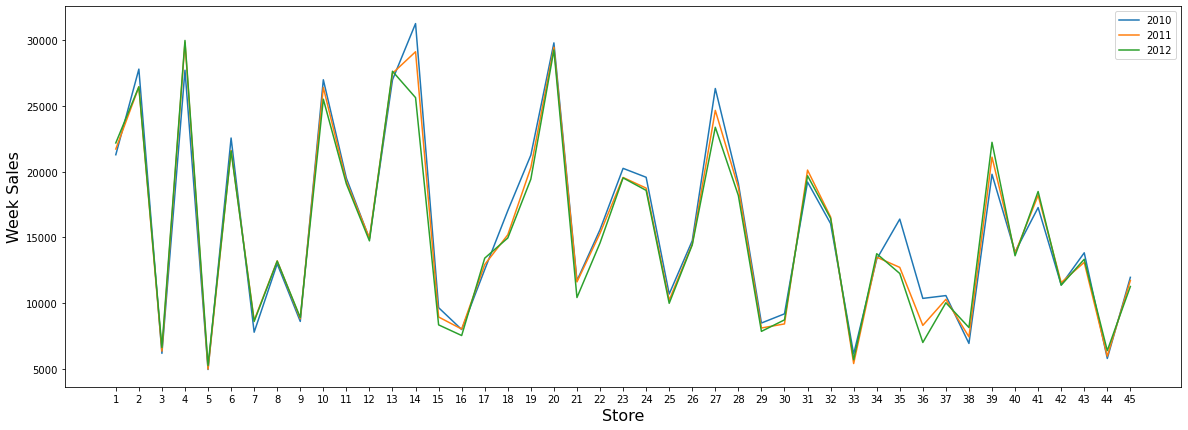

In [37]:
stores_sales2010 = df_train.loc[df_train['Year']==2010].groupby(['Store']).agg({'Weekly_Sales': ['mean', 'median']})
stores_sales2011 = df_train.loc[df_train['Year']==2011].groupby(['Store']).agg({'Weekly_Sales': ['mean', 'median']})
stores_sales2012 = df_train.loc[df_train['Year']==2012].groupby(['Store']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(20, 7))
sns.lineplot(stores_sales2010['Weekly_Sales']['mean'].index, stores_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(stores_sales2011['Weekly_Sales']['mean'].index, stores_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(stores_sales2012['Weekly_Sales']['mean'].index, stores_sales2012['Weekly_Sales']['mean'].values)

plt.xticks(np.arange(1, 46, step=1))
plt.legend(['2010', '2011', '2012'])
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

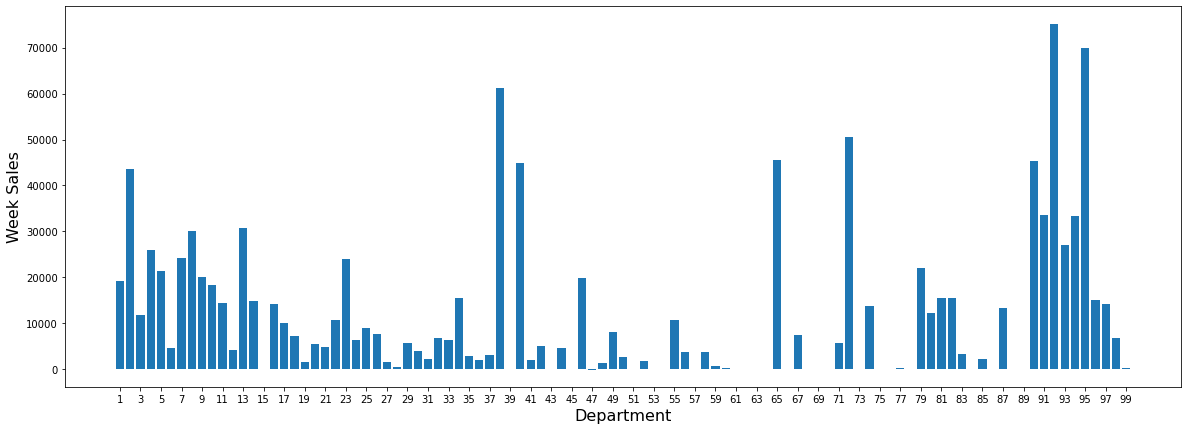

In [38]:
department = df_train.groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(20, 7))
plt.bar(department.index,department['Weekly_Sales']['mean'])
plt.xticks(np.arange(1, 100, step=2))
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

C:\Users\Sanza Vijin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sanza Vijin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sanza Vijin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


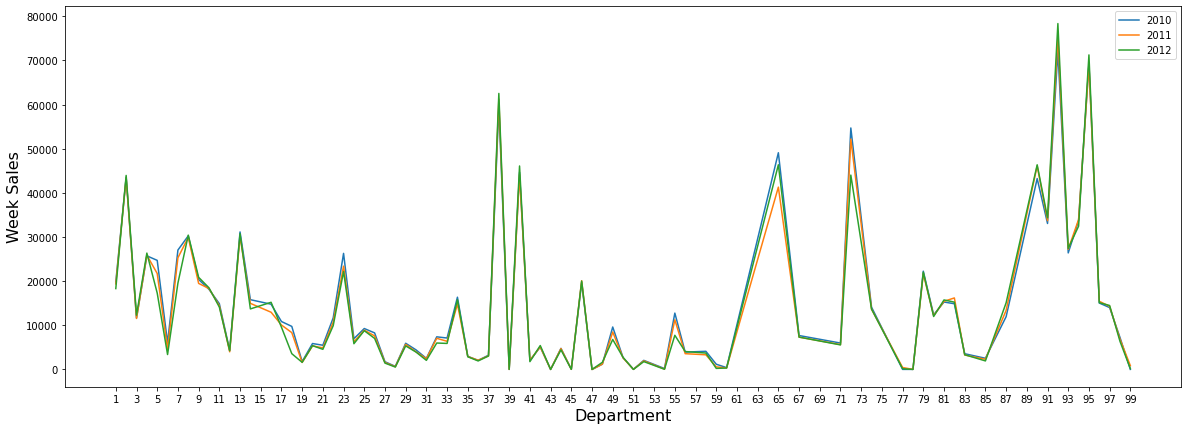

In [39]:
department_sales2010 = df_train.loc[df_train['Year']==2010].groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})
department_sales2011 = df_train.loc[df_train['Year']==2011].groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})
department_sales2012 = df_train.loc[df_train['Year']==2012].groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(20, 7))
sns.lineplot(department_sales2010['Weekly_Sales']['mean'].index, department_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(department_sales2011['Weekly_Sales']['mean'].index, department_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(department_sales2012['Weekly_Sales']['mean'].index, department_sales2012['Weekly_Sales']['mean'].values)

plt.xticks(np.arange(1, 100, step=2))
plt.legend(['2010', '2011', '2012'])

plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

Text(0.5, 0, 'Size')

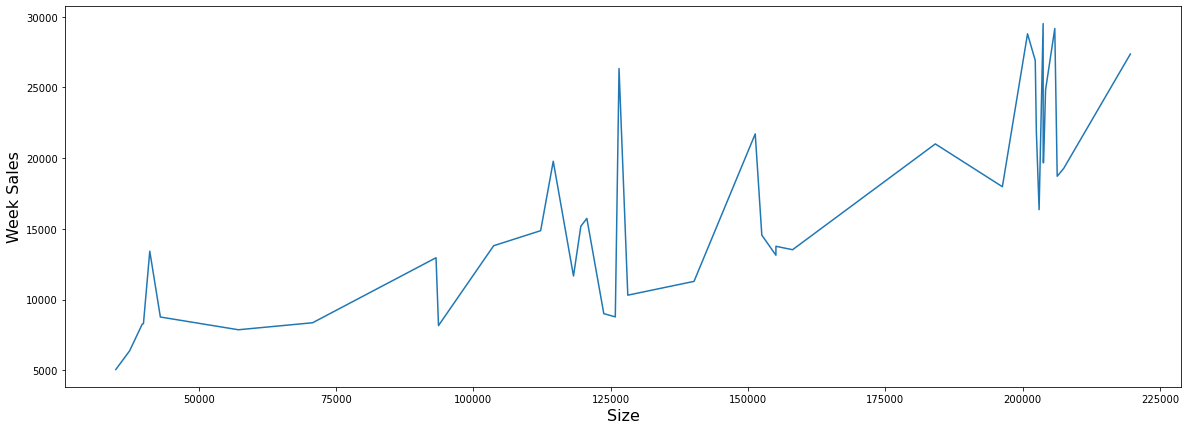

In [40]:
size = df_train.groupby(['Size']).agg({'Weekly_Sales': ['mean']})

plt.figure(figsize=(20, 7))
plt.plot(size)


plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Size', fontsize=16)

C:\Users\Sanza Vijin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sanza Vijin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sanza Vijin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


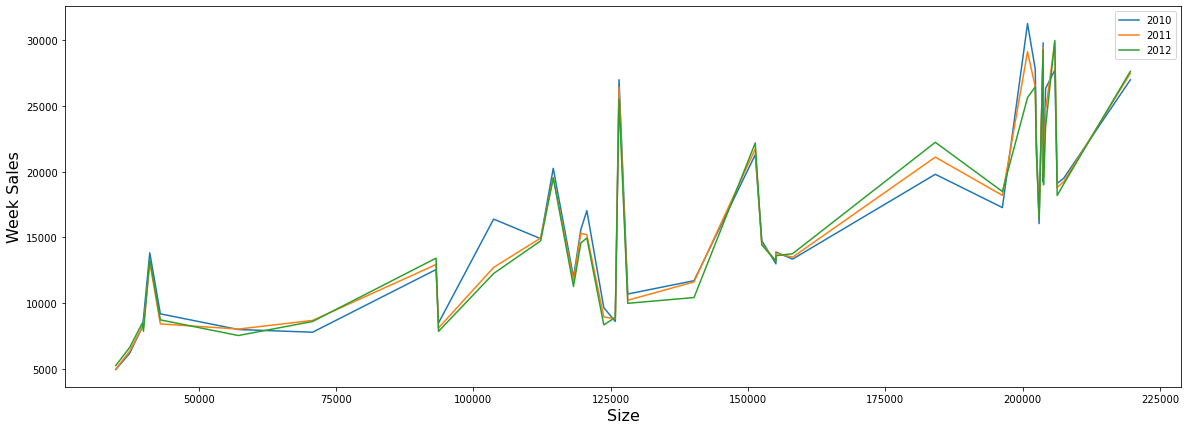

In [41]:
size_sales2010 = df_train.loc[df_train['Year']==2010].groupby(['Size']).agg({'Weekly_Sales': ['mean', 'median']})
size_sales2011 = df_train.loc[df_train['Year']==2011].groupby(['Size']).agg({'Weekly_Sales': ['mean', 'median']})
size_sales2012 = df_train.loc[df_train['Year']==2012].groupby(['Size']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(20, 7))
sns.lineplot(size_sales2010['Weekly_Sales']['mean'].index, size_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(size_sales2011['Weekly_Sales']['mean'].index, size_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(size_sales2012['Weekly_Sales']['mean'].index, size_sales2012['Weekly_Sales']['mean'].values)

plt.legend(['2010', '2011', '2012'])
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Size', fontsize=16)
plt.show()


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

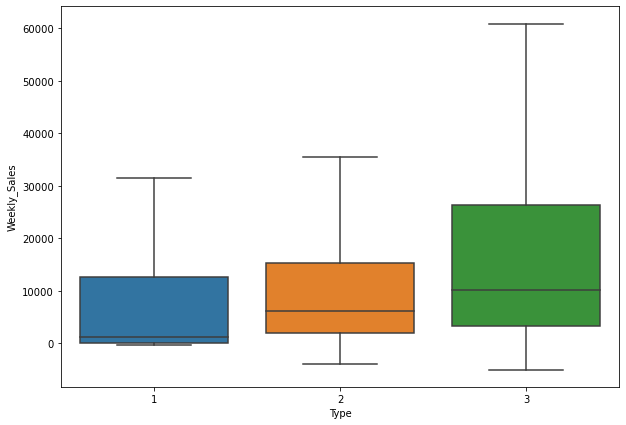

In [42]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Type', y='Weekly_Sales', data=df_train,showfliers = False)

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

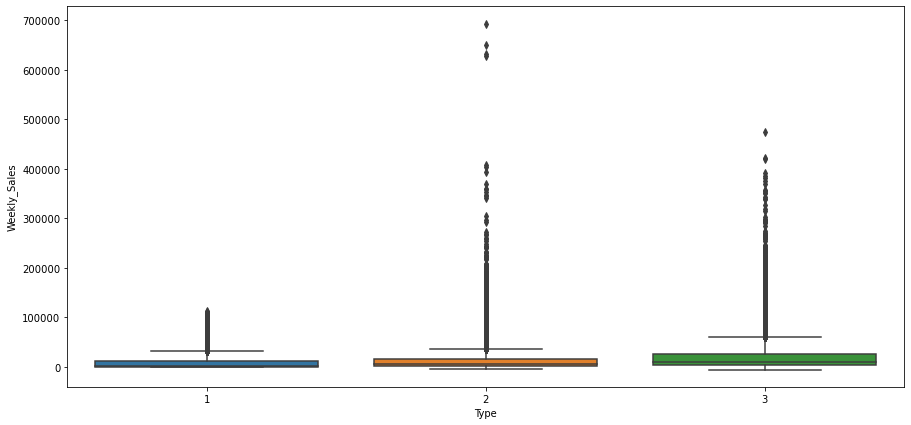

In [43]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Type', y='Weekly_Sales', data=df_train,showfliers = True)

In [44]:
sample_weight = df_train['IsHoliday'].apply(lambda x: 1 if x==0 else 5)
sample_weight_frame = pd.DataFrame(sample_weight, index=df_train.index)

In [45]:
from sklearn.metrics import make_scorer

def WMAE(y_test, y_pred):
        y_pred_df = pd.DataFrame(y_pred,index=y_test.index)
        
        weights_5 = sample_weight_frame.loc[(y_test.index)].loc[sample_weight_frame.IsHoliday==5].index
        weights_1 = sample_weight_frame.loc[(y_test.index)].loc[sample_weight_frame.IsHoliday==1].index
        
        sum_5 = np.sum(5*(abs(y_test.loc[weights_5].values-y_pred_df.loc[weights_5].values)))
        sum_1 = np.sum(abs(y_test.loc[weights_1].values-y_pred_df.loc[weights_1].values))           
        
        return np.round((sum_5+sum_1)/(5*len(weights_5)+len(weights_1)),2)
 
my_score = make_scorer(WMAE,greater_is_better=False)

In [46]:
train_all = df_train.drop(['Date'],axis=1)
train_all

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1,1,24924.50,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,5,2010
1,1,2,50605.27,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,5,2010
2,1,3,13740.12,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,5,2010
3,1,4,39954.04,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,5,2010
4,1,5,32229.38,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,43,2012
421566,45,94,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,43,2012
421567,45,95,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,43,2012
421568,45,97,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,43,2012


In [49]:
y_train_all = train_all.loc[:, ['Weekly_Sales']]
x_train_all = train_all.drop(['Weekly_Sales'], axis=1)

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)

(337256, 16)
(84314, 16)


In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# clf = RandomForestRegressor(random_state=0)
pca = PCA()

pipe = Pipeline(steps=[('clf', clf)])

param_grid = [ {
                'clf':[RandomForestRegressor()],
                'clf__n_estimators': [50,100,150],
                'clf__max_depth': [10,20,30]
                },
               
                {
                'clf': [ExtraTreesRegressor()],
                'clf__n_estimators': [50,100,150],
                'clf__max_depth': [10,20,30]
                },
               
                {
                'clf': [XGBRegressor()],  
                'clf__learning_rate':[0.1,0.05],
                'clf__min_samples_split':[5,7,9],
                'clf__max_depth':[10,20,30]
                }
              ]

rscv_all_tree = RandomizedSearchCV(pipe, param_grid, cv = 3, scoring = my_score, n_jobs=-1)
model_all_tree = rscv_all_tree.fit(x_train, y_train)

# rscv_all_tree.best_estimator_

# y_pred = rscv_all_tree.best_estimator_.predict(x_test)
print('WMAE:', WMAE(y_test, y_pred))

In [53]:
#Training with Relevant Features

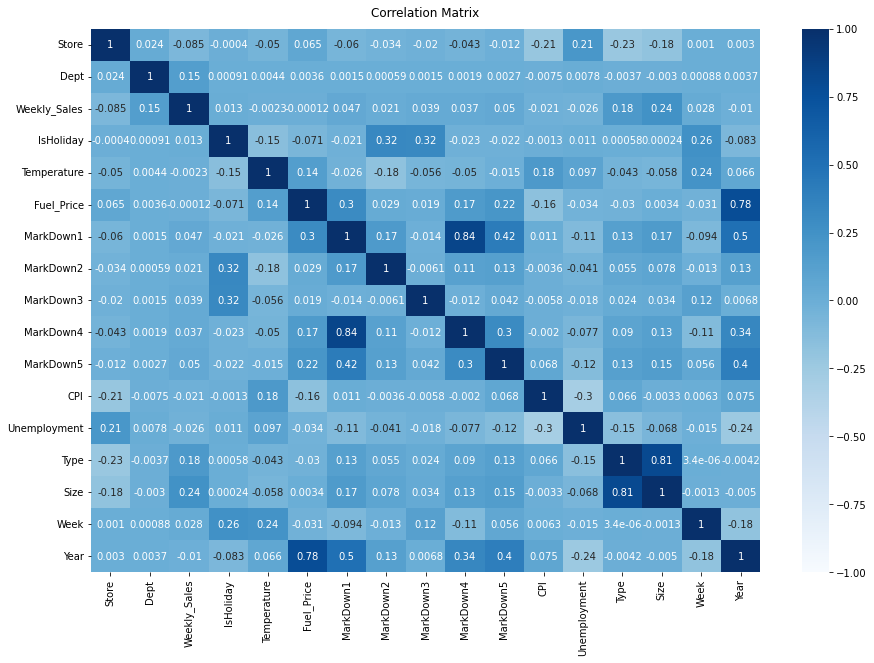

In [54]:
plt.figure(figsize=(15, 10))

heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True,cmap="Blues",annot_kws={"fontsize":10})
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':12}, pad=12);

In [55]:
train_relevant = df_train.drop(['Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'],axis=1)
train_relevant

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Week,Year
0,1,1,24924.50,0,3,151315,5,2010
1,1,2,50605.27,0,3,151315,5,2010
2,1,3,13740.12,0,3,151315,5,2010
3,1,4,39954.04,0,3,151315,5,2010
4,1,5,32229.38,0,3,151315,5,2010
...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,2,118221,43,2012
421566,45,94,5203.31,0,2,118221,43,2012
421567,45,95,56017.47,0,2,118221,43,2012
421568,45,97,6817.48,0,2,118221,43,2012


In [57]:
y_relevant = train_relevant.loc[:, ['Weekly_Sales']]
x_relevant = train_relevant.drop(['Weekly_Sales'], axis=1)

In [58]:
from sklearn.model_selection import train_test_split

x_train_relevant, x_test_relevant, y_train_relevant, y_test_relevant = train_test_split(x_relevant, y_relevant, test_size=0.2, random_state=0)

print(x_train_relevant.shape)
print(x_test_relevant.shape)

(337256, 7)
(84314, 7)


In [ ]:
clf = RandomForestRegressor(random_state=0)
pca = PCA()

pipe = Pipeline(steps=[('clf', clf)])

param_grid = [ {
                'clf':[RandomForestRegressor()],
                'clf__n_estimators': [50,100,150],
                'clf__max_depth': [10,20,30]
                },
               
                {
                'clf': [ExtraTreesRegressor()],
                'clf__n_estimators': [50,100,150],
                'clf__max_depth': [10,20,30]
                },
               
                {
                'clf': [XGBRegressor()],  
                'clf__learning_rate':[0.1,0.05],
                'clf__min_samples_split':[5,7,9],
                'clf__max_depth':[10,20,30]
                }
              ]

rscv_relevant_tree = RandomizedSearchCV(pipe, param_grid, cv = 3, scoring = my_score, n_jobs=-1)
model_relevant_tree = rscv_relevant_tree.fit(x_train_relevant, y_train_relevant)

In [ ]:
rscv_relevant_tree.best_estimator_

In [ ]:
y_pred= rscv_relevant_tree.best_estimator_.predict(x_test_relevant)
print('WMAE:', WMAE(y_test_relevant, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(random_state=0)

pipe = Pipeline(steps=[('clf', clf)])

param_grid_rf = [ {
                'clf':[RandomForestRegressor()],
                'clf__n_estimators': [140,150,160],
                'clf__max_depth': [25,30,35],
                'clf__max_features': ['auto',5,6]
                }
              ]

gscv_rf1 = GridSearchCV(pipe, param_grid_rf, cv = 3, scoring = my_score, n_jobs=-1)
model_rf1 = gscv_rf1.fit(x_train_relevant, y_train_relevant)

In [ ]:
gscv_rf1.best_estimator_

In [ ]:
y_pred_rf = gscv_rf1.best_estimator_.predict(x_test_relevant)
print('WMAE:', WMAE(y_test_relevant, y_pred_rf))

In [ ]:
plt.rcParams["figure.figsize"] = (5,3)

importances = gscv_rf1.best_estimator_._final_estimator.feature_importances_

attributes = list(x_train_relevant.columns)
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='gray', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=5)
plt.xlabel('Relative Importance',fontsize=5)
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
plt.xlim([0.0, 0.25])
plt.show()

In [ ]:
date = df_test['Date']
test = df_test.drop(['Date'], axis=1)

In [ ]:
test_relevant = test.drop(['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI', 'Unemployment'],axis=1)
test_relevant = test_relevant.sort_values(['Store', 'Dept'], ascending=[True, True])
y_pred_rf = gscv_rf1.best_estimator_.predict(test_relevant)

In [ ]:
test_relevant['Date'] = date
test_relevant = test_relevant.sort_values(['Store', 'Dept'], ascending=[True, True])
test_relevant['Weekly_Sales'] = y_pred_rf
test_relevant

In [ ]:
test = test_relevant

weekly_sales_train = df_train.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean']}).reset_index()
weekly_sales_test = test.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean']}).reset_index()

indices = weekly_sales_train.shape[0] + weekly_sales_test['Weekly_Sales'].index 
plt.figure(figsize=(20, 7))
sns.lineplot(weekly_sales_train['Weekly_Sales'].index,weekly_sales_train['Weekly_Sales']['mean'], color='gray')
sns.lineplot(indices,weekly_sales_test['Weekly_Sales']['mean'],color = 'red')

In [ ]:
plt.figure(figsize=(20, 7))

weekly_sales2010 = df_train.loc[df_train['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean']})
weekly_sales2011 = df_train.loc[df_train['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean']})
weekly_sales2012 = df_train.loc[df_train['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean']})
weekly_sales2012_test = test.loc[test['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean']})
weekly_sales2013_test = test.loc[test['Year']==2013].groupby(['Week']).agg({'Weekly_Sales': ['mean']})

sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values, color='gray')
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values, color='gray')
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values, color='gray')
sns.lineplot(weekly_sales2012_test['Weekly_Sales']['mean'].index, weekly_sales2012_test['Weekly_Sales']['mean'].values, color='red')
sns.lineplot(weekly_sales2013_test['Weekly_Sales']['mean'].index, weekly_sales2013_test['Weekly_Sales']['mean'].values, color='red')

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012','2012 test', '2013 test'])
plt.show()

In [ ]:
sampleSubmission = pd.read_csv('sampleSubmission.csv')

In [ ]:
sampleSubmission['Weekly_Sales'] = y_pred_rf
sampleSubmission.to_csv('submission.csv',index=False)
sampleSubmission